# Part B (Neural Network from Scratch)

You need to implement a neural network from scratch .This is a multiclass classification problem. No. of hidden layers depends on you but should be atleast 2.Remember to use activation function. You can add any other function of your choice.

In [124]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [125]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [126]:
print(X.shape,y.shape)

(150, 4) (150,)


In [127]:
def parameters(layers_no):
    np.random.seed(1)
    parameters = {}
    L = len(layers_no)  # number of layers in the network

    for l in range(1, L):
        parameters['Weight' + str(l)] = np.random.randn(layers_no[l], layers_no[l-1]) * 0.01
        parameters['Bias' + str(l)] = np.zeros((layers_no[l], 1))

    return parameters

In [128]:

#activation functions
def sigmoid(Z):
     return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / expZ.sum(axis=0, keepdims=True)

In [129]:
def forward(X, parameters):
    dic_AandZ = {}
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        Z = np.dot(parameters['Weight' + str(l)], A_prev) + parameters['Bias' + str(l)]
        A = relu(Z)
        dic_AandZ['Act' + str(l)] = A
        dic_AandZ['Z_funct' + str(l)] = Z

    ZL = np.dot(parameters['Weight' + str(L)], A) + parameters['Bias' + str(L)]
    AL = softmax(ZL)
    dic_AandZ['Act' + str(L)] = AL
    dic_AandZ['Z_funct' + str(L)] = ZL

    return AL, dic_AandZ


In [130]:
def cost_funct(AL,Y):
    m = Y.shape[1]  # Number of examples

    # Compute the cross-entropy cost
    cost = -np.sum(Y * np.log(AL + 1e-8)) / m  # Adding 1e-8 to avoid log(0)

    cost = np.squeeze(cost)  # Ensure cost is a scalar value

    return cost

In [131]:
# use Gradient descent as of now as an optimizer

In [132]:
def backward(X, Y, parameters_2, caches):
    grads = {}
    L = len(parameters_2) // 2
    m = X.shape[1]
    Y = Y.reshape(caches['Act' + str(L)].shape)

    dZL = caches['Act' + str(L)] - Y
    grads['dW' + str(L)] = np.dot(dZL, caches['Act' + str(L-1)].T) / m
    grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True) / m

    for l in reversed(range(1, L)):
        dA = np.dot(parameters_2['Weight' + str(l+1)].T, dZL)
        dZ = np.multiply(dA, np.int64(caches['Act' + str(l)] > 0))
        dW = np.dot(dZ, caches['Act' + str(l-1)].T) / m if l > 1 else np.dot(dZ, X.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m

        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db

        dZL = dZ

    return grads

In [133]:
#using Gradient Descent
def update_parameters(parameters_3, grads, learning_rate):
    L = len(parameters_3) // 2

    for l in range(1, L + 1):
        parameters_3['Weight' + str(l)] -= learning_rate * grads['dW' + str(l)]
        parameters_3['Bias' + str(l)] -= learning_rate * grads['db' + str(l)]

    return parameters_3

In [134]:
def model(X, Y, layers_dims, learning_rate = 0.01, num_iterations=4000, print_cost = False):
    np.random.seed(1)
    costs = []
    parameters_1 = parameters(layers_dims)

    for i in range(0, num_iterations):
        AL, caches = forward(X, parameters_1)
        cost = cost_funct(AL, Y)
        grads = backward(X, Y, parameters_1, caches)
        parameters_1= update_parameters(parameters_1, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if i % 100 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters_1

In [135]:
def predict(X, parameters_4):
    AL, _ = forward(X, parameters_4)
    predictions = np.argmax(AL, axis=0)
    return predictions

In [136]:
def compute_f1_score(y_true, y_pred):
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='weighted')

Cost after iteration 0: 1.098629
Cost after iteration 100: 1.098483
Cost after iteration 200: 1.098358
Cost after iteration 300: 1.098208
Cost after iteration 400: 1.098033
Cost after iteration 500: 1.097801
Cost after iteration 600: 1.097472
Cost after iteration 700: 1.096981
Cost after iteration 800: 1.096212
Cost after iteration 900: 1.094944
Cost after iteration 1000: 1.092702
Cost after iteration 1100: 1.088328
Cost after iteration 1200: 1.078861
Cost after iteration 1300: 1.055547
Cost after iteration 1400: 0.994610
Cost after iteration 1500: 0.869428
Cost after iteration 1600: 0.736286
Cost after iteration 1700: 0.607303
Cost after iteration 1800: 0.496452
Cost after iteration 1900: 0.424864
Cost after iteration 2000: 0.368222
Cost after iteration 2100: 0.313780
Cost after iteration 2200: 0.261504
Cost after iteration 2300: 0.215985
Cost after iteration 2400: 0.180200
Cost after iteration 2500: 0.153731
Cost after iteration 2600: 0.134521
Cost after iteration 2700: 0.120479
Cost

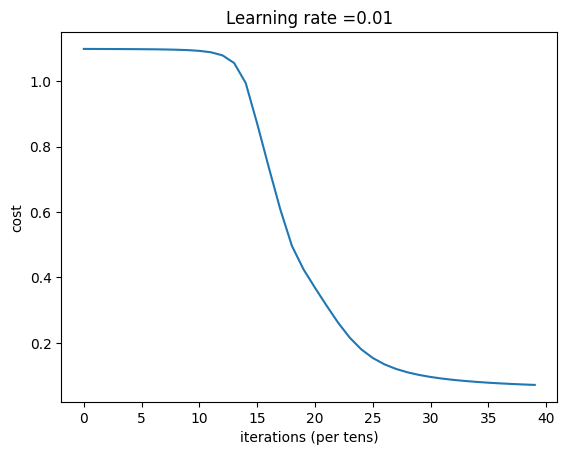

F1 score: 0.9799819837854068


In [137]:
layers_dims = [4, 128, 64, 3]  # 3-layer model: 4 input features, 2 hidden layers (10 and 5 units), 3 output classes
y = y.astype(int)  # Ensure y is of integer type
Y = np.eye(3)[y.reshape(-1)].T

parameters = model(X.T, Y, layers_dims, num_iterations = 4000, print_cost = True)
predictions = predict(X.T, parameters)
f1 = compute_f1_score(y, predictions)

print("F1 score:", f1)